# Load Data

In [34]:
import zipfile
import os

# Path to the uploaded zip file
zip_path = "archive.zip"

# Directory to extract files
extract_to = "debate_data"

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"✅ Extracted to: {extract_to}")

✅ Extracted to: debate_data


# Explore Data File Structure

In [35]:
# See what files were extracted
files = os.listdir(extract_to)
print(files[:10])  # Print first 10 files

['data_dir']


In [37]:
import os

# Define path to the subfolder
data_dir_path = os.path.join("debate_data", "data_dir")

# List files inside data_dir
json_files = os.listdir(data_dir_path)
print(json_files[:10])  # Show first 10 files

['october-21-1984.json', 'october-15-2008.json', 'october-19-2016.json', 'october-11-2012.json', 'october-5-1988.json', 'october-21-1960.json', 'october-15-1992.json', 'october-11-1984.json', 'september-21-1980.json', 'october-17-2000.json']


In [43]:
import json
import os

# Define full path to the file
file_path = os.path.join("debate_data", "data_dir", "october-15-2008.json")

# Load JSON
with open(file_path, "r", encoding="utf-8") as f:
    debate = json.load(f)

print(debate.keys())

dict_keys(['content', 'date'])


In [44]:
print(type(debate["content"]))

<class 'list'>


In [61]:
print(debate)

{'content': [{'actor': 'Ms. Ridings', 'dialogue': 'Good evening from the Kentucky Center for the Arts in Louisville, Kentucky. Im Dorothy Ridings, president of the League of Women Voters, the sponsor of tonights first Presidential debate between Republican Ronald Reagan and Democrat Walter Mondale. Tonights debate marks the third consecutive Presidential election in which the League is presenting the candidates for the Nations highest office in face-to-face debate. Our panelists are James Wieghart, national political correspondent for Scripps-Howard News Service; Diane Sawyer, correspondent for the CBS program 60 Minutes; and Fred Barnes, national political correspondent for the Baltimore Sun. Barbara Walters of ABC News, who is appearing in her fourth Presidential debate, is our moderator. Barbara.'}, {'actor': 'Ms. Walters', 'dialogue': 'Thank you, Dorothy. A few words as we begin tonights debate about the format. The position of the candidates  that is, who answers questions first a

# Convert to Dataframe

In [50]:
import os
import json
import pandas as pd

# 📂 Define the folder where all debate files are stored
data_dir_path = os.path.join("debate_data", "data_dir")

# 📜 Collect all JSON file paths
json_files = [
    os.path.join(data_dir_path, f)
    for f in os.listdir(data_dir_path)
    if f.endswith(".json")
]

# 📊 List to store data from all files
all_rows = []

# 🔁 Loop through each JSON file
for file_path in json_files:
    with open(file_path, "r", encoding="utf-8") as f:
        debate = json.load(f)
        content = debate.get("content", [])
        date = " ".join(debate.get("date", []))
        
        for entry in content:
            actor = entry.get("actor", "UNKNOWN")
            dialogue = entry.get("dialogue", "")
            all_rows.append({"date": date, "actor": actor, "dialogue": dialogue})

# 🧱 Create one DataFrame
df = pd.DataFrame(all_rows)

# ✅ Preview the result
df.head(20)  # Or use df.tail() to see end

,date,actor,dialogue
0,October 21 1984,Ms. Ridings,Good evening from the Municipal Auditorium in ...
1,October 21 1984,Mr. Newman,"Dorothy Ridings, thank you. A brief word about..."
2,October 21 1984,Ms. Geyer,"Mr. Mondale, two related questions on the cruc..."
3,October 21 1984,Mr. Mondale,I believe that the question oversimplifies the...
4,October 21 1984,Ms. Geyer,"Mr. Mondale, if I could broaden the question j..."
5,October 21 1984,Mr. Mondale,"We absolutely must, which is why I responded t..."
6,October 21 1984,Ms. Geyer,"Mr. President, in the last few months it has s..."
7,October 21 1984,The President,"No, but Im glad you asked that question, becau..."
8,October 21 1984,Ms. Geyer,"Well, Mr. President, you are implying then tha..."
9,October 21 1984,The President,Im afraid I misspoke when I said a CIA head in...


# Explore Dataframe

In [51]:
df.shape

(9243, 3)

In [55]:
df_trump_2020 = df_trump[df_trump["date"].str.contains("2020")]
df_trump_2020.head(30)

,date,actor,dialogue
5918,September 29 2020,Trump,How are you doing?
5921,September 29 2020,Trump,"Thank you very much, Chris. I will tell you ve..."
5924,September 29 2020,Trump,"Thank you, Joe."
5926,September 29 2020,Trump,There arent a hundred million people with pre-...
5928,September 29 2020,Trump,"During that period of time, during that period..."
5930,September 29 2020,Trump,"Well, youre certainly going to socialist. Your..."
5935,September 29 2020,Trump,Thats not what youve said and its not what you...
5937,September 29 2020,Trump,Your party doesnt say it. Your party wants to ...
5939,September 29 2020,Trump,"And theyre going to dominate you, Joe. You kno..."
5941,September 29 2020,Trump,Not according to Harris.


# Sentiment Score over Time (VADER)

In [56]:
# Extract the year (assumes format like "October 21 1984")
df["date"] = df["date"].apply(lambda x: x.split()[-1])

# Preview the updated DataFrame
df.head(20)

,date,actor,dialogue
0,1984,Ms. Ridings,Good evening from the Municipal Auditorium in ...
1,1984,Mr. Newman,"Dorothy Ridings, thank you. A brief word about..."
2,1984,Ms. Geyer,"Mr. Mondale, two related questions on the cruc..."
3,1984,Mr. Mondale,I believe that the question oversimplifies the...
4,1984,Ms. Geyer,"Mr. Mondale, if I could broaden the question j..."
5,1984,Mr. Mondale,"We absolutely must, which is why I responded t..."
6,1984,Ms. Geyer,"Mr. President, in the last few months it has s..."
7,1984,The President,"No, but Im glad you asked that question, becau..."
8,1984,Ms. Geyer,"Well, Mr. President, you are implying then tha..."
9,1984,The President,Im afraid I misspoke when I said a CIA head in...


In [57]:
# 📦 Step 1: Install VADER
!pip install vaderSentiment

# 📥 Step 2: Import and Initialize VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

analyzer = SentimentIntensityAnalyzer()

# 📊 Step 3: Apply sentiment analysis to 'dialogue' column
df["sentiment_score"] = df["dialogue"].apply(lambda text: analyzer.polarity_scores(text)["compound"])

# ✅ Step 4: Preview the DataFrame
df.head(20)

,date,actor,dialogue,sentiment_score
0,1984,Ms. Ridings,Good evening from the Municipal Auditorium in ...,0.5267
1,1984,Mr. Newman,"Dorothy Ridings, thank you. A brief word about...",-0.6124
2,1984,Ms. Geyer,"Mr. Mondale, two related questions on the cruc...",-0.9528
3,1984,Mr. Mondale,I believe that the question oversimplifies the...,0.9408
4,1984,Ms. Geyer,"Mr. Mondale, if I could broaden the question j...",-0.8271
5,1984,Mr. Mondale,"We absolutely must, which is why I responded t...",0.7184
6,1984,Ms. Geyer,"Mr. President, in the last few months it has s...",-0.7431
7,1984,The President,"No, but Im glad you asked that question, becau...",0.8196
8,1984,Ms. Geyer,"Well, Mr. President, you are implying then tha...",0.2953
9,1984,The President,Im afraid I misspoke when I said a CIA head in...,-0.3182


In [59]:
avg_sentiment_by_year = df.groupby("date")["sentiment_score"].mean().reset_index()
avg_sentiment_by_year.columns = ["year", "avg_sentiment_score"]

# Show result
avg_sentiment_by_year.head(30)

,year,avg_sentiment_score
0,1960,0.324234
1,1976,0.279629
2,1980,0.221122
3,1984,0.142633
4,1988,0.259765
5,1992,0.189286
6,1996,0.332255
7,2000,0.280824
8,2004,0.147317
9,2008,0.209572


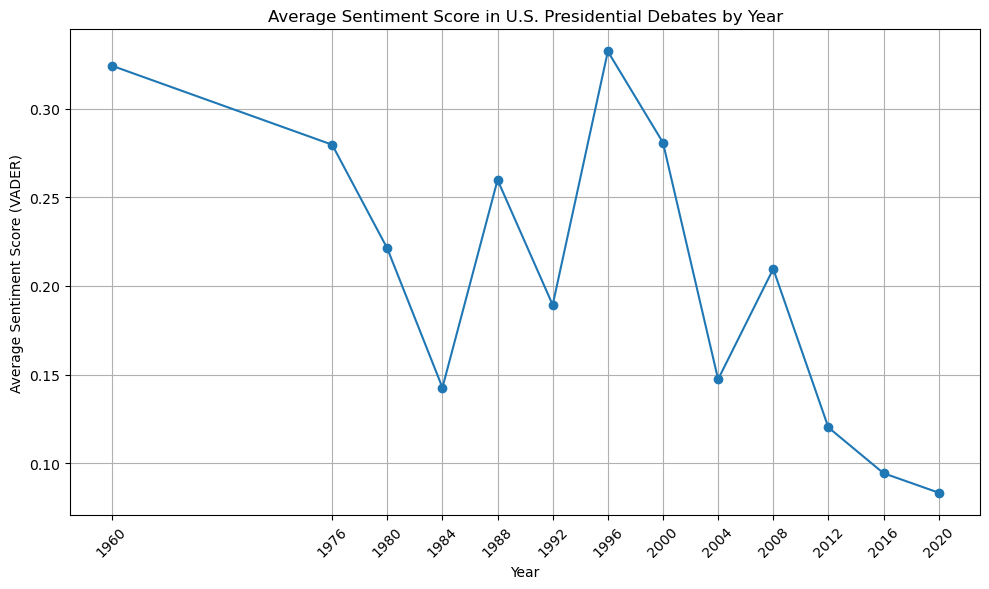

In [60]:
import matplotlib.pyplot as plt

# Ensure years are sorted numerically if they are strings
avg_sentiment_by_year["year"] = avg_sentiment_by_year["year"].astype(int)
avg_sentiment_by_year = avg_sentiment_by_year.sort_values("year")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(
    avg_sentiment_by_year["year"],
    avg_sentiment_by_year["avg_sentiment_score"],
    marker="o",
    linestyle="-"
)
plt.title("Average Sentiment Score in U.S. Presidential Debates by Year")
plt.xlabel("Year")
plt.ylabel("Average Sentiment Score (VADER)")
plt.xticks(avg_sentiment_by_year["year"], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Sentiment Score over Time (BERT)

In [63]:
!pip install transformers torch --quiet

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load model and tokenizer
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Build the sentiment pipeline
bert_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Function to convert "X stars" → normalized sentiment score [-1, 1]
def star_to_score(label):
    stars = int(label.split()[0])  # Extract number from 'X stars'
    return (stars - 3) / 2         # Normalize: 1→-1, 3→0, 5→+1

# Function to compute BERT sentiment in batches
def compute_bert_sentiments(dialogues, batch_size=100):
    scores = []
    for i in range(0, len(dialogues), batch_size):
        batch = dialogues[i:i+batch_size]
        result = bert_pipeline(batch, truncation=True)
        scores.extend([star_to_score(r["label"]) for r in result])
    return scores

# Add sentiment score to DataFrame
df["bert_sentiment_score"] = compute_bert_sentiments(df["dialogue"].tolist())

# Preview
df[["date", "actor", "dialogue", "sentiment_score", "bert_sentiment_score"]].head(10)

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

Device set to use cpu
